# Customer Segmentation Project - Identify, Who are your Loyal Customers !

So what is Customer segmentation ?
It is one methodology using which we can divide our customers base into group of individuals who are similar in either gender, 
spending behavior, frequency to visit, age or any other demographies.

To segment customers  Calculate :
    1. RFM score for each customer
    2. Create clusters using K-means

What is RFM (recency, frequency, monetary) analysis? 
RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, 
frequency and monetary total of their recent transactions to identify the best customers 
and perform targeted marketing campaigns.

In [1]:
# Import necessory libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('RetailData.csv', encoding='latin-1')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# Check shape
df.shape

(541909, 8)

In [6]:
# Customer distribution by country

country_cust_data = df[['Country', 'CustomerID']].drop_duplicates()
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [7]:
# Keep only United Kingdom data 

df = df.query("Country=='United Kingdom'").reset_index(drop=True)

In [8]:
# Check for missing values in dataset 

df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [9]:
# Remove missing values from CustomerID column, can ignore missing values in Description column
df = df[pd.notnull(df['CustomerID'])]
# Validate if there are any negative values inn Quantity column
df.Quantity.min()

-80995

In [10]:
# Validate if there are any negative values in UnitPrice column
df.UnitPrice.min()

0.0

In [11]:
# Filter out records with negative values
df = df[(df['Quantity'] >0)]

In [12]:
df.Quantity.min()    # we can see filter worked

1

In [13]:
# convert string date field to datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
# add new column depicting total amount

df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [15]:
# check shape of DF after data is cleaned

df.shape

(354345, 9)

In [16]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


# RFM Modelling

# Recency , Frequency, Monetary

In [17]:
# Recency - Latest Date - LAst Invoice Date, Frequency = count of invoice no. of transactions , Monetary = Sum of Total Amount 
# for each customer
import datetime as dt

# Set Latest date 2011-12-10 as Last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

# Create RFM modelling scoresfor each customer 
RFMscores = df.groupby('CustomerID').agg({'InvoiceDate':lambda x:(Latest_Date - x.max()).days, 'InvoiceNo' : lambda x:len(x), 
                                         'TotalAmount': lambda x: x.sum()})

# Convert Invoice Date into type int 
RFMscores['InvoiceDate'] = RFMscores['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency, Monetary
RFMscores.rename(columns={'InvoiceDate' : 'Recency',
                         'InvoiceNo' : 'Frequency',
                         'TotalAmount' : 'Monetary'}, inplace=True)
                        
RFMscores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [18]:
# Descriptive statistics (Recency)
RFMscores.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

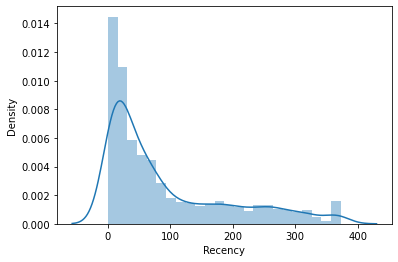

In [19]:
# Recency distributon plot
import seaborn as sns
x= RFMscores['Recency']
ax = sns.distplot(x)

In [20]:
# Descriptive statistics (frequency)
RFMscores.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

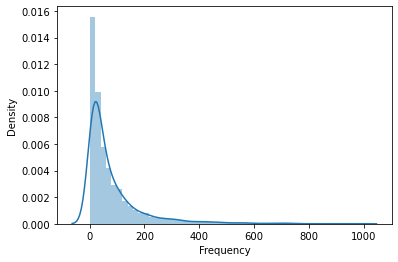

In [21]:
# Frequency distributon plot
#import seaborn as sns
x= RFMscores.query('Frequency <1000')['Frequency']
ax = sns.distplot(x)

In [22]:
# Descriptive statistics (Monetary)
RFMscores.Monetary.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

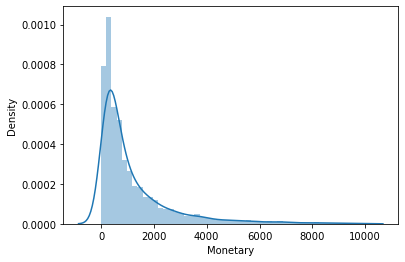

In [23]:
# Monetary distributon plot
#import seaborn as sns
x= RFMscores.query('Monetary < 10000')['Monetary']
ax = sns.distplot(x)

In [24]:
# Split into four segments using quantiles
quantiles = RFMscores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [25]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [26]:
# Function to create R, F and M segments

def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
           
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [27]:
# Calculate add R,F and M segment value segment value columns in the existing dataset to show R, F, M segment values
RFMscores['R'] = RFMscores['Recency'].apply(RScoring, args=('Recency', quantiles, ))
RFMscores['F'] = RFMscores['Frequency'].apply(FnMScoring, args=('Frequency', quantiles, ))
RFMscores['M'] = RFMscores['Monetary'].apply(FnMScoring, args=('Monetary', quantiles, ))

RFMscores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [28]:
# Calculate and add RFMGroup value column showing combined concatenated score of RFM
RFMscores['RFMGroup'] = RFMscores.R.map(str) + RFMscores.F.map(str) + RFMscores.M.map(str)

# Calculate and add RFMScore value column showing total sum of RFMGroup values

RFMscores['RFMScore'] = RFMscores[['R','F','M']].sum(axis=1)

RFMscores.head()


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [29]:
# Assign loyalty score based on RFMscore 

Loyalty_Level = ['Platinum', 'Gold','Silver','Bronze']
Score_cuts = pd.qcut(RFMscores.RFMScore, q=4, labels= Loyalty_Level)
RFMscores['RFM_Loyalty_Level'] = Score_cuts.values
RFMscores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum


In [30]:
# Validate the data for RFMGroup = 111
RFMscores[RFMscores['RFMGroup'] =='111'].sort_values('Monetary', ascending= False).reset_index().head(5) 
#.to_csv('loyal customer')

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
1,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
2,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
3,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
4,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum


from this data company can focus more on Platinum loyalty level customers because they are more loyal peoples

# End RFM modelling

# K - means Clustering

How to Normalize and Standardize the before building the K - means Clustering model ?

In [31]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

In [32]:
#pip install chart_studio

In [34]:
# Recency vs Frequency
graph = RFMscores.query("Monetary< 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y = graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        mode = 'markers',
        name='Bronze',
        marker = dict(size=7,
                     line = dict(width=1),
                     color= 'blue',
                     opacity = 0.8
                     )
    ),
    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y = graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        mode = 'markers',
        name='Silver',
        marker = dict(size=9,
                     line = dict(width=1),
                     color='green',
                     opacity = 0.5
                     )
    ),
    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y = graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        mode = 'markers',
        name='Gold',
        marker = dict(size=11,
                     line = dict(width=1),
                     color='red',
                     opacity = 0.9
                     )
    ),
    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y = graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        mode = 'markers',
        name='Platinum',
        marker = dict(size=13,
                     line = dict(width=1),
                     color='black',
                     opacity = 0.9
                     )
    ),
]
plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
)
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary
graph = RFMscores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary
graph = RFMscores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

## K-Means Clustering

In [36]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMscores['Recency'] = [handle_neg_n_zero(x) for x in RFMscores.Recency]
RFMscores['Monetary'] = [handle_neg_n_zero(x) for x in RFMscores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMscores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

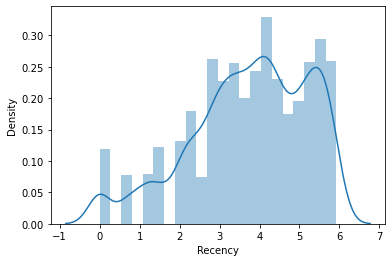

In [37]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

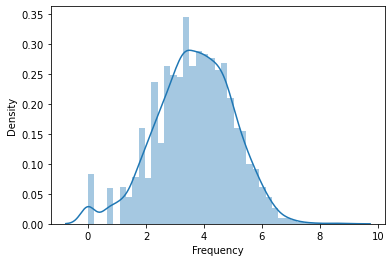

In [38]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

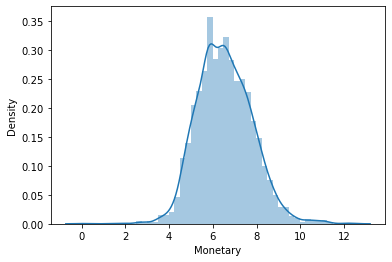

In [39]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [41]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMscores.index, columns = Log_Tfd_Data.columns)

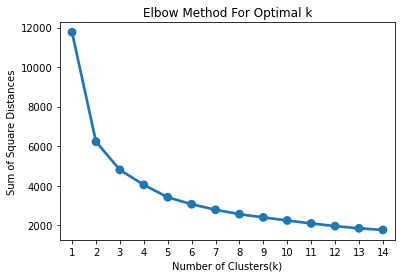

In [42]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [44]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMscores['Cluster'] = KMean_clust.labels_
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,2
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,0
12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,0
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,0
12820.0,3,59,942.34,1,2,2,122,5,Platinum,0


<Figure size 504x504 with 0 Axes>

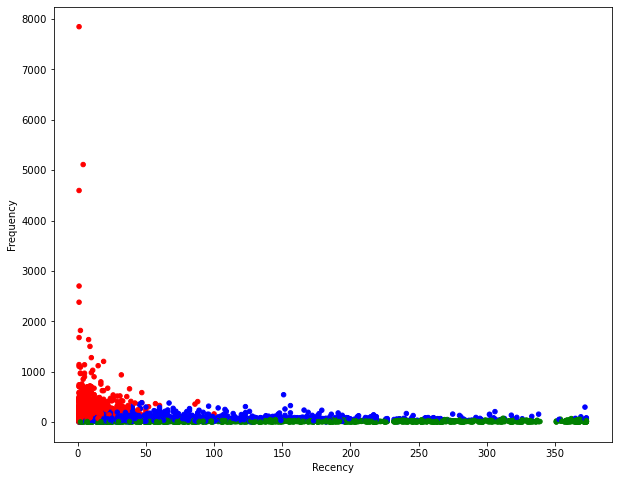

In [45]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMscores['Color'] = RFMscores['Cluster'].map(lambda p: Colors[p])
ax = RFMscores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMscores['Color']
)


In [47]:
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,2,blue
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,0,red
12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,0,red
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,0,red
12820.0,3,59,942.34,1,2,2,122,5,Platinum,0,red
